In [57]:
import numpy as np

# 1. Human capital accumulation

Consider a worker living in **two periods**, $t \in \{1,2\}$. 

In each period she decides whether to **work ($l_t = 1$) or not ($l_t = 0$)**. 

She can *not* borrow or save and thus **consumes all of her income** in each period. 

If she **works** her **consumption** becomes:

$$c_t = w h_t l_t\,\,\text{if}\,\,l_t=1$$

where $w$ is **the wage rate** and $h_t$ is her **human capital**. 

If she does **not work** her consumption becomes:

$$c_t = b\,\,\text{if}\,\,l_t=0$$

where $b$ is the **unemployment benefits**.

Her **utility of consumption** is: 

$$ \frac{c_t^{1-\rho}}{1-\rho} $$

Her **disutility of working** is:

$$ \gamma l_t $$

From period 1 to period 2, she **accumulates human capital** according to:

$$ h_2 = h_1 + l_1 + 
\begin{cases}
0 & \text{with prob. }0.5 \\
\Delta & \text{with prob. }0.5 
\end{cases} \\
$$

where $\Delta$ is a **stochastic experience gain**.

In the **second period** the worker thus solves:

$$
\begin{eqnarray*}
v_{2}(h_{2}) & = &\max_{l_{2}} \frac{c_2^{1-\rho}}{1-\rho} - \gamma l_2
\\ & \text{s.t.} & \\
c_{2}& = & w h_2 l_2 \\
l_{2}& \in &\{0,1\}
\end{eqnarray*}
$$

In the **first period** the worker thus solves:

$$
\begin{eqnarray*}
v_{1}(h_{1}) &=& \max_{l_{1}} \frac{c_1^{1-\rho}}{1-\rho} - \gamma l_1 + \beta\mathbb{E}_{1}\left[v_2(h_2)\right]
\\ & \text{s.t.} & \\
c_1 &=& w h_1 l_1 \\
h_2 &=& h_1 + l_1 + \begin{cases}
0 & \text{with prob. }0.5\\
\Delta & \text{with prob. }0.5 
\end{cases}\\
l_{1} &\in& \{0,1\}\\
\end{eqnarray*}
$$

where $\beta$ is the **discount factor** and $\mathbb{E}_{1}\left[v_2(h_2)\right]$ is the **expected value of living in period two**.

The **parameters** of the model are:

In [58]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

The **relevant levels of human capital** are:

In [59]:
h_vec = np.linspace(0.1,1.5,100)

**Question 1:** Solve the model in period 2 and illustrate the solution (including labor supply as a function of human capital). 

**Question 2:** Solve the model in period 1 and illustrate the solution (including labor supply as a function of human capital). 

**Question 3:** Will the worker never work if her potential wage income is lower than the unemployment benefits she can get? Explain and illustrate why or why not.

**Question 1:** Solve the model in period 2 and illustrate the solution (including labor supply as a function of human capital). 


In [60]:
import numpy as np
from scipy import optimize

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def consumption(w,b,l,h):
    return (1-l)*b+w*h*l 

def utility(b,w,h,rho,l,gamma):
    return ((1-l)*b+w*h*l)**(1-rho)/(1-rho)-gamma*l

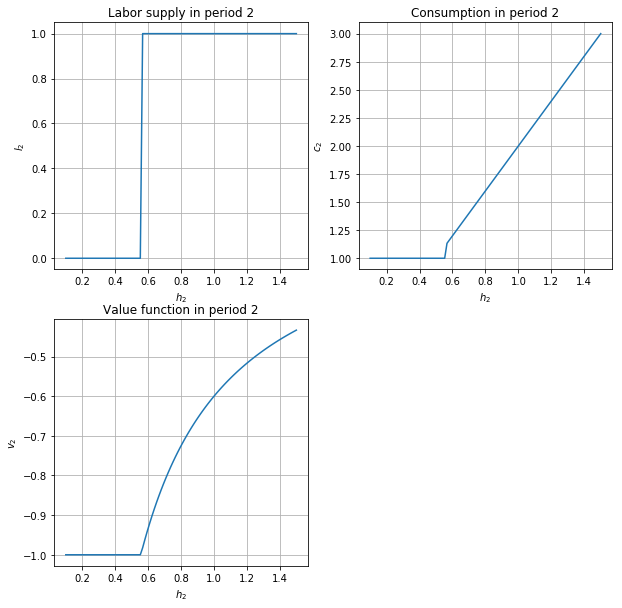

In [62]:
#Initialize vectors
h2_vec = np.linspace(0.1,1.5,100) 
utility_choice = np.empty((100,2))

#Utility from working given different human capital levels
for i in range(len(h2_vec)):
    h2 = h2_vec[i]
    utility_choice[i,0] = utility(b,w,h2,rho,0,gamma)
    utility_choice[i,1] = utility(b,w,h2,rho,1,gamma)

    
opt_l2 = np.argmax(utility_choice, axis=1)
opt_c2 = consumption(w,b,opt_l2,h2_vec) 
opt_v2 = utility(b,w,h2_vec,rho,opt_l2,gamma)

# illustration
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.plot(h2_vec,opt_l2)
ax.grid()
ax.set_xlabel('$h_2$')
ax.set_ylabel('$l_2$')
ax.set_title('Labor supply in period 2');

ax = fig.add_subplot(2,2,2)
ax.plot(h2_vec,opt_c2)
ax.grid()
ax.set_xlabel('$h_2$')
ax.set_ylabel('$c_2$')
ax.set_title('Consumption in period 2');

ax = fig.add_subplot(2,2,3)
ax.plot(h2_vec,opt_v2)
ax.grid()
ax.set_xlabel('$h_2$')
ax.set_ylabel('$v_2$')
ax.set_title('Value function in period 2');


**Question 2:** Solve the model in period 1 and illustrate the solution (including labor supply as a function of human capital). 

In [39]:
from scipy import interpolate

def utility_1(l1,rho,b,w,h1):
    return (((1-l1)*b+h1*w*l1)**(1-rho))/(1-rho)-gamma*l1

def v1(l1,h1,rho,beta,b,w,Delta,v2_interp):
    
    # a. v2 value, if low delta
    h2_low = h1 + l1
    v2_low = v2_interp([h2_low])[0]
    
    # b. v2 value, if high delta
    h2_high = h1 + l1 + Delta
    v2_high = v2_interp([h2_high])[0]
    
    # c. expected v2 value
    v2 = 0.5*v2_low + 0.5*v2_high
    
    # d. total value
    return utility_1(l1,rho,b,w,h1) + beta*v2


v2_interp = interpolate.RegularGridInterpolator([h2_vec], opt_v2,
                                                bounds_error=False,fill_value=None)

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

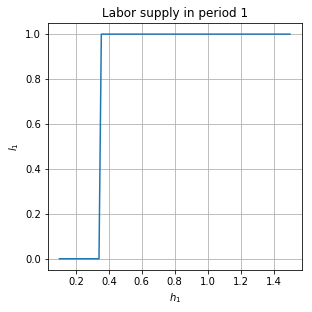

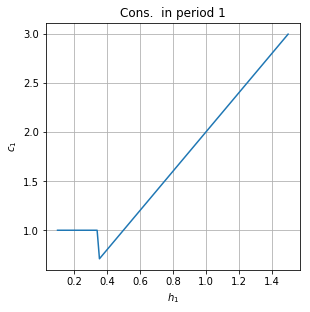

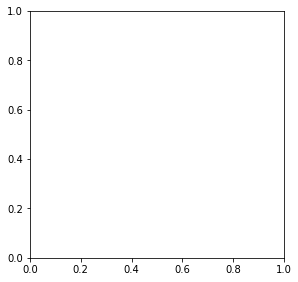

In [54]:
#Initialize vectors
h1_vec = np.linspace(0.1,1.5,100) 
utility_choice_period1 = np.empty((100,2))

#Utility from not working
#utility_nowork_vec_period1=np.full((100, 1), v1(0,h1_vec,rho,beta,b,w,Delta,v2_interp))

#Utility from working given different human capital levels
for i in range(len(h2_vec)):
    h1 = h1_vec[i]
    utility_choice_period1[i,0] = v1(0,h1,rho,beta,b,w,Delta,v2_interp)
    utility_choice_period1[i,1] = v1(1,h1,rho,beta,b,w,Delta,v2_interp)

    
opt_l1 = np.argmax(utility_choice_period1, axis=1)
opt_c1 = consumption(w,b,opt_l1,h1_vec) 
#opt_v1 = v1(opt_l1,h1_vec,rho,beta,b,w,Delta,v2_interp)

# illustration
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.plot(h1_vec,opt_l1)
ax.grid()
ax.set_xlabel('$h_1$')
ax.set_ylabel('$l_1$')
ax.set_title('Labor supply in period 1');

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,2)
ax.plot(h1_vec,opt_c1)
ax.grid()
ax.set_xlabel('$h_1$')
ax.set_ylabel('$c_1$')
ax.set_title('Cons.  in period 1');

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,3)
ax.plot(h1_vec,opt_v1)
ax.grid()
ax.set_xlabel('$h_1$')
ax.set_ylabel('$v_1$')
ax.set_title('Value func. 1');


In [50]:
print(utility_choice_period1)

[[-1.96       -5.61419393]
 [-1.96       -4.9896257 ]
 [-1.96       -4.5017564 ]
 [-1.96       -4.10989945]
 [-1.96       -3.78806655]
 [-1.96       -3.51887972]
 [-1.96       -3.29027778]
 [-1.96       -3.09362721]
 [-1.96       -2.92258504]
 [-1.96       -2.77238628]
 [-1.96       -2.63938179]
 [-1.96       -2.5207296 ]
 [-1.96       -2.41418327]
 [-1.96       -2.31794363]
 [-1.96       -2.2305526 ]
 [-1.96       -2.150816  ]
 [-1.96       -2.07774635]
 [-1.96       -2.01051994]
 [-1.96       -1.94844422]
 [-1.96       -1.89093262]
 [-1.96       -1.83748502]
 [-1.96       -1.78767234]
 [-1.96       -1.74110199]
 [-1.96       -1.69744734]
 [-1.96       -1.65642916]
 [-1.95939496 -1.61780297]
 [-1.95079284 -1.58135377]
 [-1.94051583 -1.54689173]
 [-1.9307266  -1.51424861]
 [-1.92139123 -1.48325444]
 [-1.91247886 -1.4537681 ]
 [-1.90396138 -1.42567077]
 [-1.89581311 -1.3988558 ]
 [-1.87953996 -1.37322718]
 [-1.86174956 -1.34869825]
 [-1.84475375 -1.32519061]
 [-1.82850017 -1.30263312]
 